# Template code for conditional quantile-unbiased analysis

This template provides regression tables and point plots for conditional, hybrid, and projection estimates.

Instructions:

1. Upload a file named `data.csv` to this folder with your conventional estimates. Open `data.csv` to see an example. In this file, we named our dependent variable "dep_variable", and have estimated the effects of policies named "policy0",..., "policy3". The first column of `data.csv` contains the conventional estimates `X` of the true unknown mean. The remaining columns contain consistent estimates of the corresponding covariance matrix $\Sigma$. In the example `data.csv` provided, $X=(0, 1, 2, 3)$ and $\Sigma = I$.
2. Modify the code if necessary.
3. Run the notebook.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from conditional_inference.bayes.classic import LinearClassicBayes
from conditional_inference.rqu import RQU

data_file = "data.csv"
alpha = .05

conventional_model = LinearClassicBayes.from_csv(data_file, prior_cov=np.inf)
rqu = RQU.from_csv(data_file)
sns.set()

In [2]:
conventional_result = conventional_model.fit(cols="sorted")
conventional_result.summary(title="Conventional estimates", alpha=alpha)

<class 'statsmodels.iolib.summary.Summary'>
"""
      Conventional estimates      
==================================
         coef pvalue [0.025 0.975]
----------------------------------
policy3 3.000  0.001  1.040  4.960
policy2 2.000  0.023  0.040  3.960
policy1 1.000  0.159 -0.960  2.960
policy0 0.000  0.500 -1.960  1.960
==========================
Dep. Variable dep_variable
--------------------------
"""

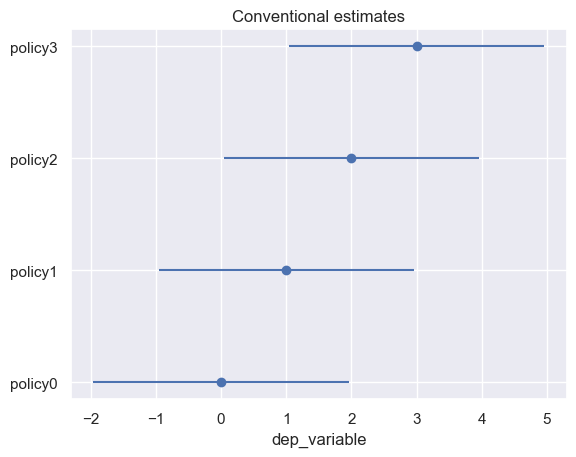

In [3]:
conventional_result.point_plot(title="Conventional estimates", alpha=alpha)
plt.show()

In [4]:
conditional_result = rqu.fit(cols="sorted")
conditional_result.summary(title="Conditional estimates", alpha=alpha)

<class 'statsmodels.iolib.summary.Summary'>
"""
          Conditional estimates           
==========================================
        coef (median) pvalue [0.025 0.975]
------------------------------------------
policy3         2.686  0.059 -0.933  4.933
policy2         2.000  0.136 -1.922  5.922
policy1         1.000  0.285 -2.922  4.922
policy0         0.314  0.406 -1.933  3.933
==========================
Dep. Variable dep_variable
--------------------------
"""

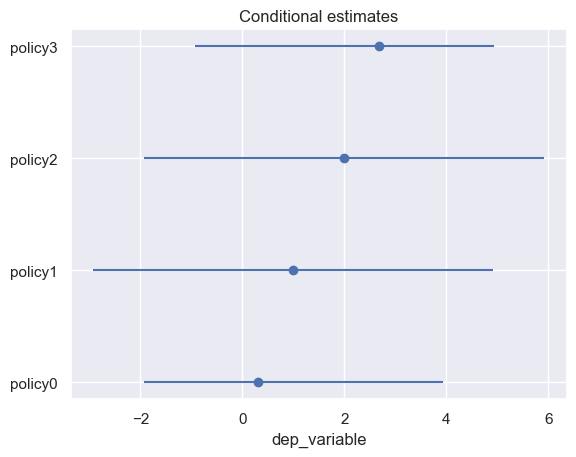

In [5]:
conditional_result.point_plot(title="Conditional estimates", alpha=alpha)
plt.show()

In [6]:
hybrid_result = rqu.fit(cols="sorted", beta=.005)
hybrid_result.summary(title="Hybrid estimates", alpha=alpha)

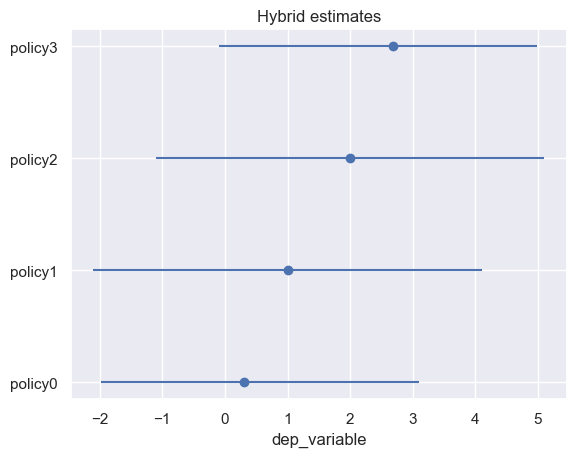

In [ ]:
hybrid_result.point_plot(title="Hybrid estimates", alpha=alpha)
plt.show()

In [ ]:
projection_result = rqu.fit(cols="sorted", projection=True)
projection_result.summary(alpha=alpha)

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Projection estimates                     
==============================================================
        coef (conventional) pvalue 0.95 CI lower 0.95 CI upper
--------------------------------------------------------------
policy3               3.000  0.006         0.482         5.518
policy2               2.000  0.088        -0.518         4.518
policy1               1.000  0.497        -1.518         3.518
policy0               0.000  0.938        -2.518         2.518
==========================
Dep. Variable dep_variable
--------------------------
"""

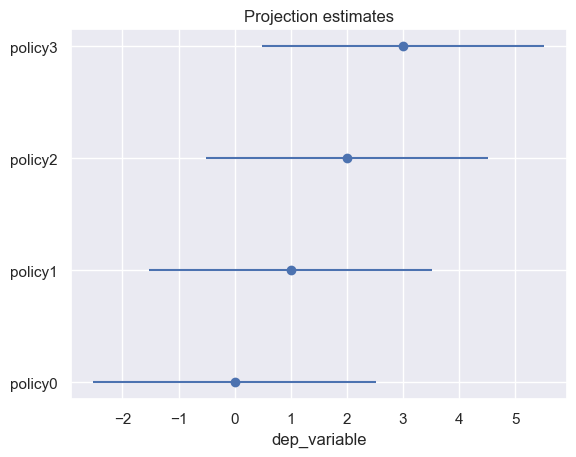

In [ ]:
projection_result.point_plot(title="Projection estimates", alpha=alpha)
plt.show()